In [8]:
import joblib
from tqdm.keras import TqdmCallback

import numpy as np
import tensorflow as tf

from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint

from math import ceil

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from sklearn.utils import class_weight

import matplotlib.pyplot as plt

In [9]:
X_train = joblib.load('full/X_train')

X_test = joblib.load('full/X_test')

y_train = joblib.load('full/y_train')

y_test = joblib.load('full/y_test')

In [11]:
yTrainBinaryClass = np.array([1 if x == 'CAD' else 0 for x in y_train])

yTestBinaryClass = np.array([1 if x == 'CAD' else 0 for x in y_test])

In [12]:
np.mean(yTrainBinaryClass), np.mean(yTestBinaryClass)

(0.8077189654543465, 0.8258028967254408)

In [13]:
classWeights = {i:x for i,x in enumerate(class_weight.compute_class_weight(class_weight='balanced', classes=[0,1], y=yTrainBinaryClass))}

In [14]:
regress = l2(0.00001)

In [15]:
checkpoint = ModelCheckpoint('model_outputs', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
model = Sequential()
model.add(Bidirectional(LSTM(64, input_shape=(600,12), return_sequences=True, kernel_regularizer=regress, recurrent_regularizer=regress)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32, return_sequences=True, kernel_regularizer=regress, recurrent_regularizer=regress)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(8, kernel_regularizer=regress, recurrent_regularizer=regress)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='Nadam',
              metrics=['accuracy'])

2022-11-05 22:09:52.466377: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
history = model.fit(X_train, yTrainBinaryClass, class_weight=classWeights,
          batch_size=64, epochs=20,
          validation_data=(X_test, yTestBinaryClass),
          verbose=0, callbacks=[TqdmCallback(verbose=1), checkpoint])

0epoch [00:00, ?epoch/s]
  0%|                                                 | 0/20 [00:00<?, ?epoch/s]
  0%|                                             | 0.00/429 [00:00<?, ?batch/s]
  0%|         | 1.00/429 [00:08<1:01:45, 8.66s/batch, loss=0.74, accuracy=0.406]
  0%|          | 2.00/429 [00:10<31:21, 4.41s/batch, loss=0.682, accuracy=0.438]
  1%|          | 3.00/429 [00:10<19:08, 2.70s/batch, loss=0.668, accuracy=0.479]
  1%|          | 4.00/429 [00:11<13:26, 1.90s/batch, loss=0.702, accuracy=0.547]
  1%|          | 5.00/429 [00:12<10:12, 1.45s/batch, loss=0.679, accuracy=0.559]
  1%|▏         | 6.00/429 [00:12<08:14, 1.17s/batch, loss=0.677, accuracy=0.581]
  2%|▏         | 7.00/429 [00:13<07:02, 1.00s/batch, loss=0.671, accuracy=0.594]
  2%|▏         | 8.00/429 [00:14<06:26, 1.09batch/s, loss=0.668, accuracy=0.588]
  2%|▏         | 9.00/429 [00:14<06:18, 1.11batch/s, loss=0.658, accuracy=0.594]
  2%|▎           | 10.0/429 [00:15<06:00, 1.16batch/s, loss=0.65, accuracy=0.62]
  3

 90%|██████████▊ | 386/429 [04:28<00:26, 1.62batch/s, loss=0.35, accuracy=0.861]


100%|██████████▉| 428/429 [04:53<00:00, 1.66batch/s, loss=0.344, accuracy=0.864]
  5%| | 1/20 [05:33<1:45:27, 333.03s/epoch, loss=0.344, accuracy=0.864, val_lossWARNING:absl:Found untraced functions such as lstm_cell_1_layer_call_fn, lstm_cell_1_layer_call_and_return_conditional_losses, lstm_cell_2_layer_call_fn, lstm_cell_2_layer_call_and_return_conditional_losses, lstm_cell_4_layer_call_fn while saving (showing 5 of 12). These functions will not be directly callable after loading.


INFO:tensorflow:Assets written to: model_outputs/assets


INFO:tensorflow:Assets written to: model_outputs/assets

  0%|                 | 0.00/429 [00:00<?, ?batch/s, loss=0.344, accuracy=0.864]
  0%|          | 1.00/429 [00:01<07:28, 1.05s/batch, loss=0.269, accuracy=0.922]
  0%|          | 2.00/429 [00:01<05:54, 1.21batch/s, loss=0.275, accuracy=0.883]
  1%|          | 3.00/429 [00:02<05:15, 1.35batch/s, loss=0.256, accuracy=0.896]
  1%|          | 4.00/429 [00:03<04:58, 1.42batch/s, loss=0.322, accuracy=0.871]
  1%|          | 5.00/429 [00:03<04:46, 1.48batch/s, loss=0.316, accuracy=0.878]
  1%|▏          | 6.00/429 [00:04<04:41, 1.50batch/s, loss=0.301, accuracy=0.88]
  2%|▏         | 7.00/429 [00:04<04:37, 1.52batch/s, loss=0.302, accuracy=0.884]
  2%|▏         | 8.00/429 [00:05<04:31, 1.55batch/s, loss=0.289, accuracy=0.885]
  2%|▏         | 9.00/429 [00:06<04:30, 1.55batch/s, loss=0.282, accuracy=0.885]
  2%|▏         | 10.0/429 [00:06<04:27, 1.57batch/s, loss=0.289, accuracy=0.886]
  3%|▎           | 11.0/429 [00:07<04:39, 1.49batch/

 90%|█████████▉ | 386/429 [04:03<00:26, 1.65batch/s, loss=0.227, accuracy=0.924]


100%|████████████▉| 428/429 [04:29<00:00, 1.60batch/s, loss=0.23, accuracy=0.92]
 10%| | 2/20 [10:54<1:37:49, 326.09s/epoch, loss=0.23, accuracy=0.92, val_loss=0WARNING:absl:Found untraced functions such as lstm_cell_1_layer_call_fn, lstm_cell_1_layer_call_and_return_conditional_losses, lstm_cell_2_layer_call_fn, lstm_cell_2_layer_call_and_return_conditional_losses, lstm_cell_4_layer_call_fn while saving (showing 5 of 12). These functions will not be directly callable after loading.


INFO:tensorflow:Assets written to: model_outputs/assets


INFO:tensorflow:Assets written to: model_outputs/assets

  0%|                   | 0.00/429 [00:00<?, ?batch/s, loss=0.23, accuracy=0.92]
  0%|          | 1.00/429 [00:00<06:35, 1.08batch/s, loss=0.286, accuracy=0.891]
  0%|           | 2.00/429 [00:01<05:24, 1.32batch/s, loss=0.201, accuracy=0.93]
  1%|          | 3.00/429 [00:02<05:03, 1.41batch/s, loss=0.164, accuracy=0.943]
  1%|          | 4.00/429 [00:02<04:50, 1.46batch/s, loss=0.164, accuracy=0.945]
  1%|          | 5.00/429 [00:03<04:42, 1.50batch/s, loss=0.205, accuracy=0.941]
  1%|▏         | 6.00/429 [00:04<04:41, 1.50batch/s, loss=0.197, accuracy=0.932]
  2%|▏         | 7.00/429 [00:04<04:30, 1.56batch/s, loss=0.189, accuracy=0.933]
  2%|▏         | 8.00/429 [00:05<04:24, 1.59batch/s, loss=0.191, accuracy=0.934]
  2%|▏         | 9.00/429 [00:06<04:27, 1.57batch/s, loss=0.188, accuracy=0.936]
  2%|▏         | 10.0/429 [00:06<04:25, 1.58batch/s, loss=0.198, accuracy=0.925]
  3%|▎         | 11.0/429 [00:07<04:19, 1.61batch/s,

 90%|█████████▉ | 386/429 [04:01<00:26, 1.62batch/s, loss=0.228, accuracy=0.922]


100%|██████████▉| 428/429 [04:27<00:00, 1.61batch/s, loss=0.221, accuracy=0.925]
 15%|▏| 3/20 [16:16<1:31:54, 324.40s/epoch, loss=0.221, accuracy=0.925, val_lossWARNING:absl:Found untraced functions such as lstm_cell_1_layer_call_fn, lstm_cell_1_layer_call_and_return_conditional_losses, lstm_cell_2_layer_call_fn, lstm_cell_2_layer_call_and_return_conditional_losses, lstm_cell_4_layer_call_fn while saving (showing 5 of 12). These functions will not be directly callable after loading.


INFO:tensorflow:Assets written to: model_outputs/assets


INFO:tensorflow:Assets written to: model_outputs/assets

  0%|                 | 0.00/429 [00:00<?, ?batch/s, loss=0.221, accuracy=0.925]
  0%|          | 1.00/429 [00:00<06:46, 1.05batch/s, loss=0.221, accuracy=0.938]
  0%|          | 2.00/429 [00:01<05:48, 1.22batch/s, loss=0.151, accuracy=0.969]
  1%|          | 3.00/429 [00:02<05:17, 1.34batch/s, loss=0.177, accuracy=0.958]
  1%|          | 4.00/429 [00:02<04:56, 1.43batch/s, loss=0.156, accuracy=0.965]
  1%|          | 5.00/429 [00:03<04:51, 1.45batch/s, loss=0.161, accuracy=0.959]
  1%|▏         | 6.00/429 [00:04<04:48, 1.47batch/s, loss=0.173, accuracy=0.958]
  2%|▏         | 7.00/429 [00:04<04:35, 1.53batch/s, loss=0.168, accuracy=0.955]
  2%|▏         | 8.00/429 [00:05<04:35, 1.53batch/s, loss=0.177, accuracy=0.941]
  2%|▏         | 9.00/429 [00:06<04:39, 1.51batch/s, loss=0.187, accuracy=0.939]
  2%|▏         | 10.0/429 [00:06<04:36, 1.51batch/s, loss=0.186, accuracy=0.941]
  3%|▎         | 11.0/429 [00:07<04:29, 1.55batch/s,

 90%|█████████▉ | 386/429 [04:00<00:26, 1.65batch/s, loss=0.169, accuracy=0.946]


100%|███████████▉| 428/429 [04:26<00:00, 1.58batch/s, loss=0.17, accuracy=0.947]
 20%|▏| 4/20 [21:35<1:25:58, 322.39s/epoch, loss=0.17, accuracy=0.947, val_loss=
  0%|                  | 0.00/429 [00:00<?, ?batch/s, loss=0.17, accuracy=0.947]
  0%|          | 1.00/429 [00:00<04:43, 1.51batch/s, loss=0.327, accuracy=0.938]
  0%|           | 2.00/429 [00:01<04:36, 1.54batch/s, loss=0.26, accuracy=0.938]
  1%|          | 3.00/429 [00:01<04:24, 1.61batch/s, loss=0.324, accuracy=0.927]
  1%|          | 4.00/429 [00:02<04:20, 1.63batch/s, loss=0.263, accuracy=0.945]
  1%|          | 5.00/429 [00:03<04:16, 1.66batch/s, loss=0.233, accuracy=0.941]
  1%|▏         | 6.00/429 [00:03<04:14, 1.66batch/s, loss=0.229, accuracy=0.938]
  2%|▏         | 7.00/429 [00:04<04:20, 1.62batch/s, loss=0.216, accuracy=0.933]
  2%|▏         | 8.00/429 [00:04<04:17, 1.64batch/s, loss=0.194, accuracy=0.941]
  2%|▏         | 9.00/429 [00:05<04:15, 1.64batch/s, loss=0.183, accuracy=0.944]
  2%|▏         | 10.0/429 [0

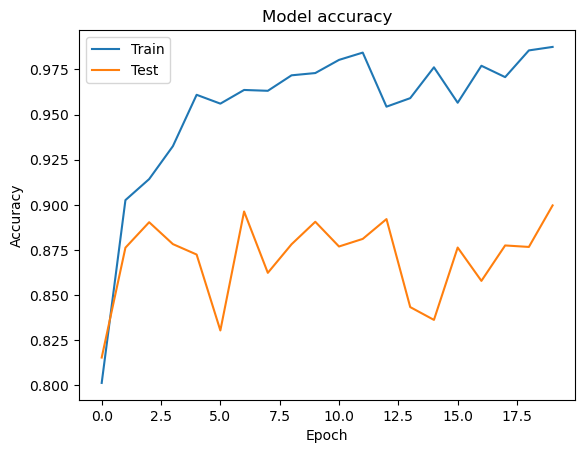

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

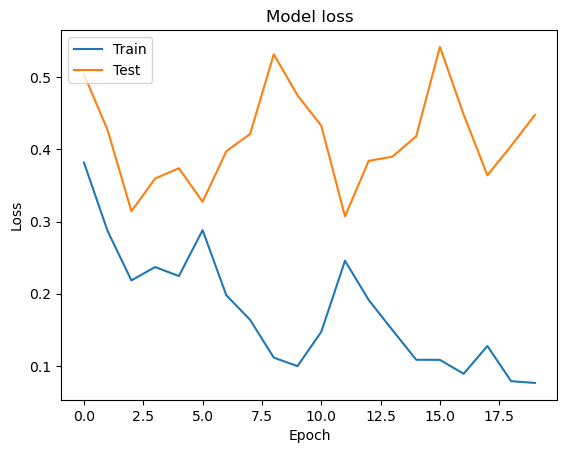

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [37]:
count = 1
for n in history.history['accuracy']:
    print(f"epoch {count} accuracy: {round(n*100,2)}%")
    count += 1

epoch 1 accuracy: 80.14%
epoch 2 accuracy: 90.26%
epoch 3 accuracy: 91.42%
epoch 4 accuracy: 93.25%
epoch 5 accuracy: 96.09%
epoch 6 accuracy: 95.6%
epoch 7 accuracy: 96.36%
epoch 8 accuracy: 96.31%
epoch 9 accuracy: 97.17%
epoch 10 accuracy: 97.3%
epoch 11 accuracy: 98.02%
epoch 12 accuracy: 98.43%
epoch 13 accuracy: 95.43%
epoch 14 accuracy: 95.91%
epoch 15 accuracy: 97.61%
epoch 16 accuracy: 95.65%
epoch 17 accuracy: 97.7%
epoch 18 accuracy: 97.07%
epoch 19 accuracy: 98.55%
epoch 20 accuracy: 98.74%


In [32]:
count = 1
for n in history.history['val_accuracy']:
    print(f"epoch {count} test_accuracy: {round(n*100,2)}%")
    count += 1

epoch 1 test_accuracy: 81.54%
epoch 2 test_accuracy: 87.63%
epoch 3 test_accuracy: 89.04%
epoch 4 test_accuracy: 87.82%
epoch 5 test_accuracy: 87.25%
epoch 6 test_accuracy: 83.04%
epoch 7 test_accuracy: 89.63%
epoch 8 test_accuracy: 86.23%
epoch 9 test_accuracy: 87.82%
epoch 10 test_accuracy: 89.06%
epoch 11 test_accuracy: 87.69%
epoch 12 test_accuracy: 88.11%
epoch 13 test_accuracy: 89.21%
epoch 14 test_accuracy: 84.34%
epoch 15 test_accuracy: 83.63%
epoch 16 test_accuracy: 87.63%
epoch 17 test_accuracy: 85.79%
epoch 18 test_accuracy: 87.75%
epoch 19 test_accuracy: 87.67%
epoch 20 test_accuracy: 89.97%


In [59]:
count = 1
for n in history.history['val_loss']:
    print(f"epoch {count} test_loss: {round(n*100,2)}%")
    count += 1

epoch 1 test_loss: 50.41%
epoch 2 test_loss: 42.67%
epoch 3 test_loss: 31.44%
epoch 4 test_loss: 35.98%
epoch 5 test_loss: 37.4%
epoch 6 test_loss: 32.75%
epoch 7 test_loss: 39.76%
epoch 8 test_loss: 42.14%
epoch 9 test_loss: 53.19%
epoch 10 test_loss: 47.5%
epoch 11 test_loss: 43.29%
epoch 12 test_loss: 30.73%
epoch 13 test_loss: 38.43%
epoch 14 test_loss: 39.01%
epoch 15 test_loss: 41.83%
epoch 16 test_loss: 54.21%
epoch 17 test_loss: 44.84%
epoch 18 test_loss: 36.41%
epoch 19 test_loss: 40.51%
epoch 20 test_loss: 44.78%
